In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

import PV_ICE

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\publications


In [3]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


In [4]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

This journal pulls out the silver demand projections for the 3 projected technologies, PERC, TOPCon, SHJ, as projected for the Energy Analysis paper (10a). We also do a literature comparison, since this is a highly studied space.

We pull in the output dataframes from journal 10a and do graphing here.

In [5]:
cc_13scen_yearly_dataOut = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','Deploy_MirletzLinear','cc_13scen_yearly.csv'),
           index_col = 0)

In [6]:
silver_annual_demand = cc_13scen_yearly_dataOut.filter(like='VirginStock_silver') #tonnes
silver_annual_demand_pvice = silver_annual_demand.filter(like='PV_ICE')
silver_annual_demand_perc = silver_annual_demand.filter(like='r_PERC')
silver_annual_demand_topcon = silver_annual_demand.filter(like='r_TOPCon')
silver_annual_demand_shj = silver_annual_demand.filter(like='r_SHJ')


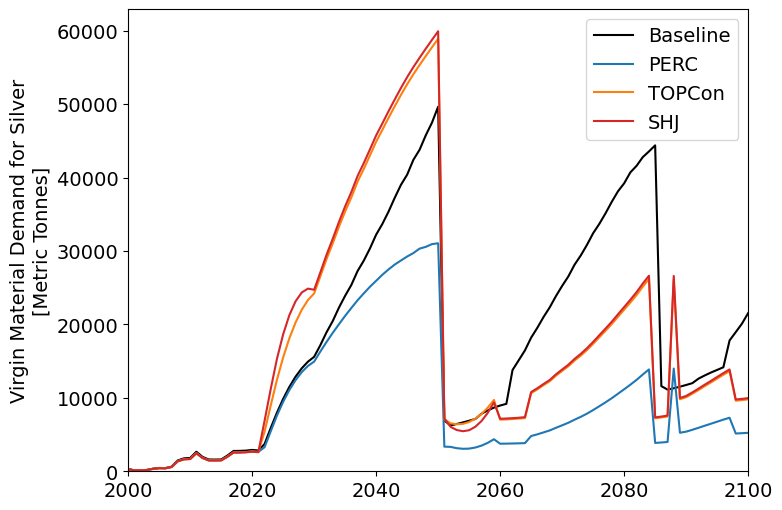

In [7]:
plt.plot(silver_annual_demand_pvice, color='black', label='Baseline')
plt.plot(silver_annual_demand_perc, color = 'tab:blue', label='PERC')
plt.plot(silver_annual_demand_topcon, color='tab:orange', label='TOPCon')
plt.plot(silver_annual_demand_shj, color='tab:red', label='SHJ')
plt.ylim(0,)
plt.xlim(2000,2100)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend()

Text(0.5, 1.0, 'Silver Demand by Technology to Achieve 75 TW')

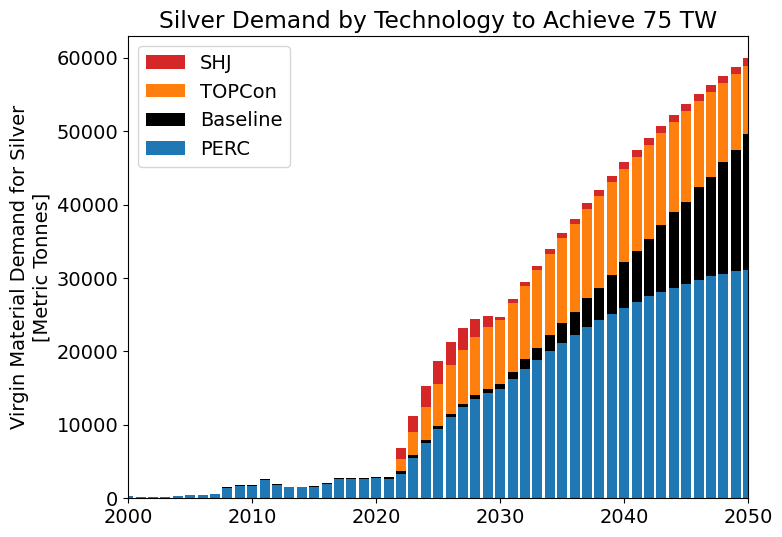

In [8]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='tab:blue', label='PERC')
plt.ylim(0,)
plt.xlim(2000,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend()
plt.title('Silver Demand by Technology to Achieve 75 TW')

## Add in Historical Silver Demand and Other Literature projections for Comparison

In [9]:
ag_WSS = pd.read_csv(os.path.join(supportMatfolder, 'WorldSilverSurvey-AgProduction-PVuse.csv'), index_col=0)
ag_WSS.head()

,PV Silver Demand [million oz],PV Silver Demand [metric tonnes],Silver Production [million ounces],Silver Production [metric tonnes],Total Supply [million troy ounces,Total Supply [metric tonnes],Global Reserves (exclude production) [ metric tonnes],Global Resources excluding reserves [metric tonnes],Global ReserveBase_USGS [tonnes]
Year,,,,,,,,,
2004,NaN,NaN,613.6,19084.94293,872.0,27122.01798,NaN,NaN,570000.0
2005,NaN,NaN,639.7,19896.73727,954.1,29675.59329,NaN,NaN,570000.0
2006,NaN,NaN,642.7,19990.04697,915.6,28478.11888,NaN,NaN,570000.0
2007,NaN,NaN,666.1,20717.86259,887.3,27597.89742,NaN,NaN,570000.0
2008,NaN,NaN,713.8,22201.48673,905.7,28170.19688,NaN,NaN,570000.0


In [10]:
ag_WSS_flatforward = ag_WSS.interpolate()

In [11]:
ag_WSS_flatforward.loc[2023,'Total Supply [metric tonnes]']

31877.70209

Text(0.5, 1.0, 'Silver Demand by Technology to Achieve 75 TW')

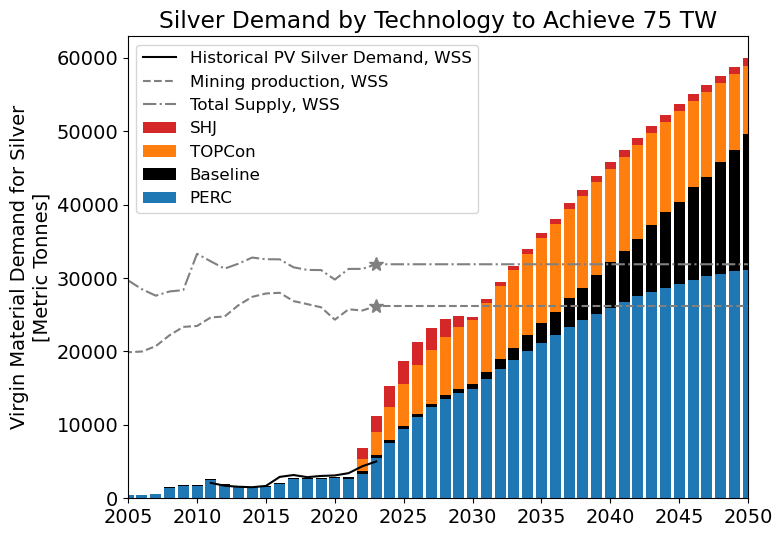

In [12]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='tab:blue', label='PERC')

plt.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], color='black', label='Historical PV Silver Demand, WSS')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'], ls='--', color='gray', label='Mining production, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'], ls='-.', color='gray', label='Total Supply, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
plt.legend(fontsize=12)
plt.ylim(0,)
plt.xlim(2005,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve 75 TW')

Text(0.5, 1.0, 'Silver Demand by Technology to Achieve 75 TW')

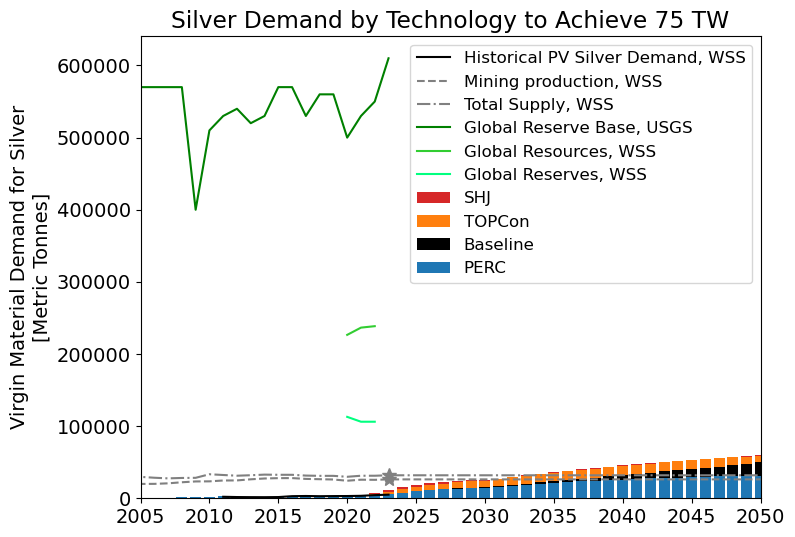

In [13]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='tab:blue', label='PERC')

plt.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], color='black', label='Historical PV Silver Demand, WSS')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'], ls='--', color='gray', label='Mining production, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'], ls='-.', color='gray', label='Total Supply, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

plt.plot(ag_WSS.index, ag_WSS['Global ReserveBase_USGS [tonnes]'], color='green', label='Global Reserve Base, USGS')
plt.plot(ag_WSS.index, ag_WSS['Global Resources excluding reserves [metric tonnes]'], color='limegreen', label='Global Resources, WSS')
plt.plot(ag_WSS.index, ag_WSS['Global Reserves (exclude production) [ metric tonnes]'], color='springgreen', label='Global Reserves, WSS')


#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
plt.legend(fontsize=12)
plt.ylim(0,)
plt.xlim(2005,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve 75 TW')

In [15]:
#read in literature compare 
ag_lit_compare = pd.read_csv(os.path.join(supportMatfolder, 'Ag_Literature_Compare.csv'), index_col=0)
ag_lit_compare_ffill = ag_lit_compare.interpolate()

In [16]:
ag_lit_compare_ffill.columns

Index(['Hallam 2022_LearningRate10%_Industry [tonnes]',
       'Hallam 2022_LearningRate10%_Ntype [tonnes]',
       'Wang 2023_1.5C_min [tonnes]', 'Wang 2023_1.5C_median [tonnes]',
       'Wang 2023_1.5C_max [tonnes]', 'Wang 2023_2C_min [tonnes]',
       'Wang 2023_2C_median [tonnes]', 'Wang 2023_2C_max [tonnes]',
       'Gervais 2021_ScenarioA [tonnes]',
       'Gervais 2021_IEA8TW_PERCmoderate [tonnes',
       'Gervais 2021_70TW_PERCmoderate', 'Gervais 2021_70TW_PERCinnovative'],
      dtype='object')

In [42]:
#read in and manipulate data from Wang et al 2023 from https://zenodo.org/records/7023703
wang2023_Agdemand = pd.read_csv(os.path.join(supportMatfolder,'Literature_AgDemand_Wang2023_AIMCGE2_SSP1-19.csv'), 
           usecols=['Year','Total Demand','MC_iteration'])

In [49]:
wang2023_Agdemand_allMC = wang2023_Agdemand.pivot(index='Year', columns='MC_iteration', values='Total Demand')
#wang2023_Agdemand_allMC
#well, apparently all the monte carlos for this gave the same answer

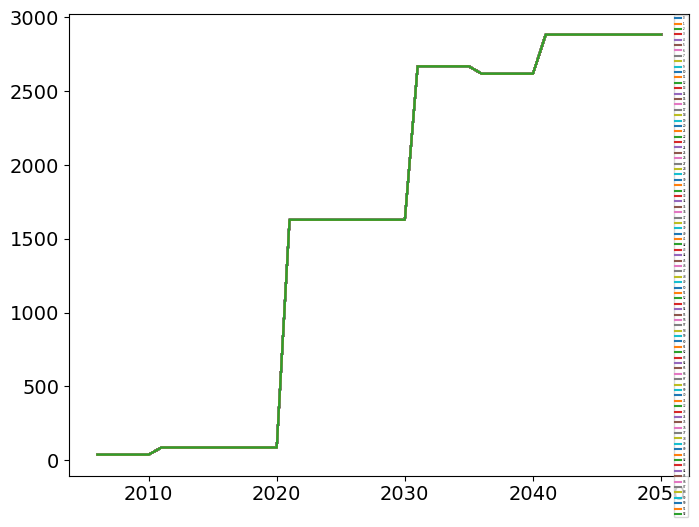

In [52]:
#well, apparently all the monte carlos for this gave the same answer
plt.plot(wang2023_Agdemand_allMC, label=wang2023_Agdemand_allMC.columns)
plt.legend(fontsize=2)

#they assume 10 tons/GW from Manberger + Stenqvist 2018

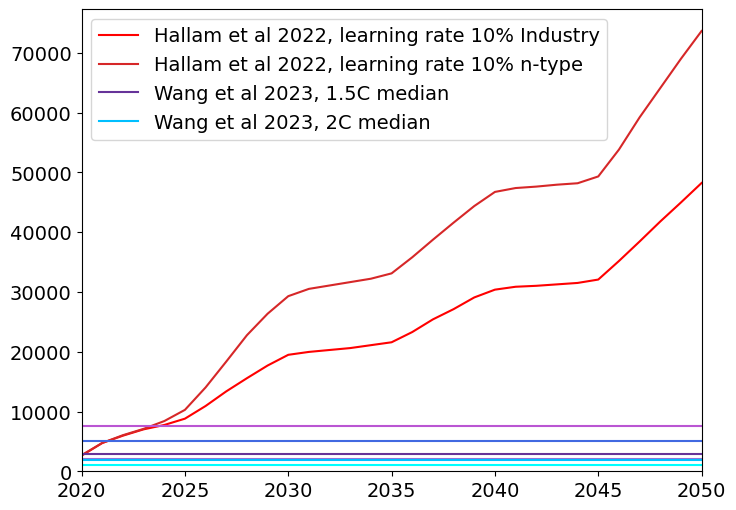

In [19]:
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'], color='red', label='Hallam et al 2022, learning rate 10% Industry')
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'], color='tab:red', label='Hallam et al 2022, learning rate 10% n-type')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_min [tonnes]'], color='mediumpurple', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_median [tonnes]'], color='rebeccapurple', label='Wang et al 2023, 1.5C median')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_max [tonnes]'], color='mediumorchid', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_min [tonnes]'], color='aqua', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_median [tonnes]'], color='deepskyblue', label='Wang et al 2023, 2C median')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_max [tonnes]'], color='royalblue', label='')

plt.ylim(0,)
plt.xlim(2020, 2050)
plt.legend()

In [ ]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='tab:blue', label='PERC')

plt.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], color='black', label='Historical PV Silver Demand, WSS')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'], ls='--', color='gray', label='Mining production, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'], ls='-.', color='gray', label='Total Supply, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

plt.plot(ag_lit_compare_ffill['Hallam 2022 [kilotons]'], color='red', label='Hallam et al 2022')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_min [tonnes]'], color='mediumpurple', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_median [tonnes]'], color='rebeccapurple', label='Wang et al 2023, 1.5C median')
plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_max [tonnes]'], color='mediumorchid', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_min [tonnes]'], color='aqua', label='')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_median [tonnes]'], color='deepskyblue', label='Wang et al 2023, 2C median')
plt.plot(ag_lit_compare_ffill['Wang 2023_2C_max [tonnes]'], color='royalblue', label='')

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
plt.legend(fontsize=12)
plt.ylim(0,)
plt.xlim(2005,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve 75 TW')

### Energy Compare of these techs